In [10]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error
df = pd.read_csv(r"C:\Users\12114\OneDrive\Desktop\projects\DATASET FOR CRYPTOCURRENCY\crypto_combine.csv")

In [11]:
df.head()

,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0


In [12]:
df.describe()

,Open,High,Low,Close
count,7899.000000,7899.000000,7899.000000,7899.000000
mean,5479.620176,5623.947143,5324.149024,5480.870398
std,12010.579332,12325.039614,11665.236339,12011.567525
min,0.140000,0.150000,0.120000,0.140000
25%,12.720000,13.410000,12.405000,12.680000
50%,170.910000,176.240000,163.320000,170.890000
75%,3879.000000,3962.000000,3757.000000,3878.935000
max,67802.000000,68925.000000,66112.000000,67802.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  7899 non-null   object 
 1   Date    7899 non-null   object 
 2   Open    7899 non-null   float64
 3   High    7899 non-null   float64
 4   Low     7899 non-null   float64
 5   Close   7899 non-null   float64
dtypes: float64(4), object(2)
memory usage: 370.4+ KB


In [14]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract year, month, day, day of the week, quarter, and season as new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter
# Define conditions and corresponding values for mapping months to seasons
conditions = [
    df['Month'].isin([12, 1, 2]),
    df['Month'].isin([3, 4, 5]),
    df['Month'].isin([6, 7, 8]),
    ~df['Month'].isin([12, 1, 2, 3, 4, 5, 6, 7, 8])
]
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
# Use numpy.select to create a new 'Season' column
df['Season'] = np.select(conditions, seasons)
df.head(10)

C:\Users\12114\AppData\Local\Temp\ipykernel_31952\3342099294.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Crypto,Date,Open,High,Low,Close,Year,Month,Day,DayOfWeek,Quarter,Season
0,BTC,2019-12-31,7254.0,7309.0,7132.0,7171.0,2019,12,31,1,4,Winter
1,BTC,2019-12-30,7402.0,7430.0,7217.0,7254.0,2019,12,30,0,4,Winter
2,BTC,2019-12-29,7334.0,7529.0,7295.0,7402.0,2019,12,29,6,4,Winter
3,BTC,2019-12-28,7235.0,7359.0,7235.0,7334.0,2019,12,28,5,4,Winter
4,BTC,2019-12-27,7208.0,7267.0,7087.0,7235.0,2019,12,27,4,4,Winter
5,BTC,2019-12-26,7218.0,7437.0,7179.0,7208.0,2019,12,26,3,4,Winter
6,BTC,2019-12-25,7255.0,7268.0,7130.0,7214.0,2019,12,25,2,4,Winter
7,BTC,2019-12-24,7328.0,7417.0,7168.0,7255.0,2019,12,24,1,4,Winter
8,BTC,2019-12-23,7420.0,7696.0,7302.0,7328.0,2019,12,23,0,4,Winter
9,BTC,2019-12-22,7145.0,7463.0,7138.0,7420.0,2019,12,22,6,4,Winter


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Crypto     7899 non-null   object        
 1   Date       7899 non-null   datetime64[ns]
 2   Open       7899 non-null   float64       
 3   High       7899 non-null   float64       
 4   Low        7899 non-null   float64       
 5   Close      7899 non-null   float64       
 6   Year       7899 non-null   int32         
 7   Month      7899 non-null   int32         
 8   Day        7899 non-null   int32         
 9   DayOfWeek  7899 non-null   int32         
 10  Quarter    7899 non-null   int32         
 11  Season     7899 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(5), object(2)
memory usage: 586.4+ KB


In [16]:
# Summary statistics
numeric_cols = ['Open', 'High', 'Low', 'Close']
summary_stats = df[numeric_cols].describe()
print(summary_stats)


               Open          High           Low         Close
count   7899.000000   7899.000000   7899.000000   7899.000000
mean    5479.620176   5623.947143   5324.149024   5480.870398
std    12010.579332  12325.039614  11665.236339  12011.567525
min        0.140000      0.150000      0.120000      0.140000
25%       12.720000     13.410000     12.405000     12.680000
50%      170.910000    176.240000    163.320000    170.890000
75%     3879.000000   3962.000000   3757.000000   3878.935000
max    67802.000000  68925.000000  66112.000000  67802.000000


In [17]:
pip install seaborn

You should consider upgrading via the 'c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\Scripts\python.exe -m pip install --upgrade pip' command.


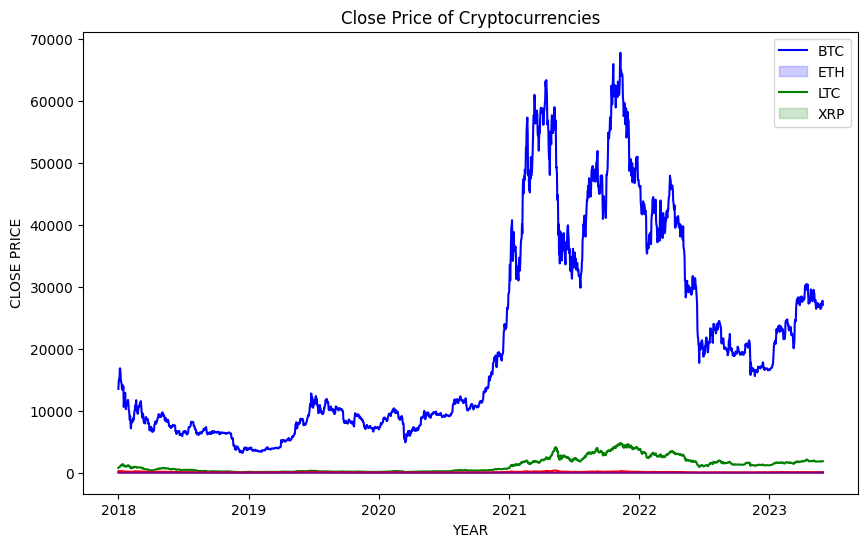

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error
# Line chart for 'Close' price over time
crypto_list = df['Crypto'].unique()

# Create a new DataFrame for plotting with a MultiIndex
plot_df = df.set_index(['Date', 'Crypto'])['Close'].unstack()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot the data using seaborn's lineplot
plt.figure(figsize=(10, 6))
for i, crypto in enumerate(crypto_list):
    sns.lineplot(data=plot_df[crypto], color=colors[i], label=crypto)
plt.xlabel('YEAR')
plt.ylabel('CLOSE PRICE')
plt.title('Close Price of Cryptocurrencies')
plt.legend(crypto_list)
plt.show()

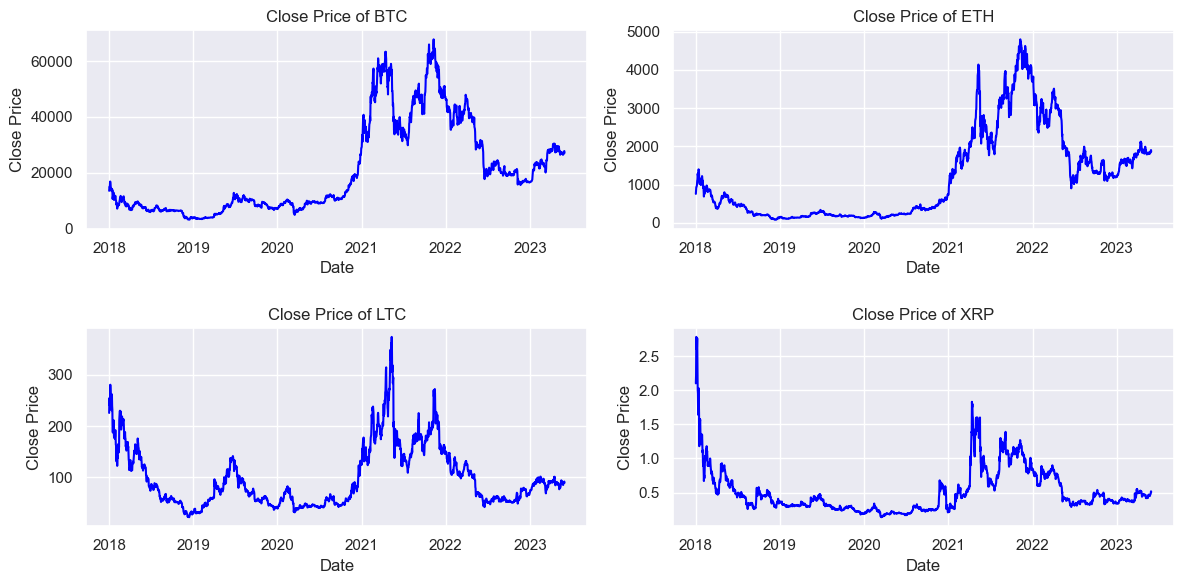

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df and crypto_list are defined and the data is processed as in your previous code
crypto_list = df['Crypto'].unique()
# Create a new DataFrame for plotting with a MultiIndex
plot_df = df.set_index(['Date', 'Crypto'])['Close'].unstack()

# Set the style of seaborn
sns.set(style="darkgrid")

# Define the number of rows and columns for the subplots
num_rows = (len(crypto_list) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Flatten the axes array if needed
axes = axes.flatten()

# Plot each cryptocurrency separately
for i, (crypto, ax) in enumerate(zip(crypto_list, axes)):
    sns.lineplot(data=plot_df[crypto], color='blue', ax=ax)
    ax.set_title(f'Close Price of {crypto}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# List of cryptocurrency symbols
crypto_symbols = ['BTC', 'ETH', 'LTC', 'XRP']

# Perform Augmented Dickey-Fuller test for each cryptocurrency
for crypto in crypto_symbols:
    crypto_close = df[df['Crypto'] == crypto]['Close']
    result = adfuller(crypto_close)
    print(f"\nResults for {crypto} - Close Price:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] <= 0.05:
        print(f"{crypto} - The data is likely stationary")
    else:
        print(f"{crypto} - The data is likely non-stationary")


Results for BTC - Close Price:
ADF Statistic: -1.7200868027704992
p-value: 0.4207939958964887
Critical Values:
	1%: -3.433675467561267
	5%: -2.863008999826203
	10%: -2.5675520348463654
BTC - The data is likely non-stationary

Results for ETH - Close Price:
ADF Statistic: -2.6143260411396025
p-value: 0.09007236701467769
Critical Values:
	1%: -3.4336771595431106
	5%: -2.863009746829746
	10%: -2.5675524325901415
ETH - The data is likely non-stationary

Results for LTC - Close Price:
ADF Statistic: -2.7926700632646977
p-value: 0.05932844962984139
Critical Values:
	1%: -3.433690757634069
	5%: -2.8630157503198075
	10%: -2.5675556291649313
LTC - The data is likely non-stationary

Results for XRP - Close Price:
ADF Statistic: -4.156347102860172
p-value: 0.0007804345191278135
Critical Values:
	1%: -3.4336941745418956
	5%: -2.8630172588634664
	10%: -2.5675564323938564
XRP - The data is likely stationary


In [21]:
#btc
import statsmodels.api as sm
# Filter BTC data from the DataFrame
btc_data = df[df['Crypto'] == 'BTC']

# Extract the 'Close' prices for BTC
btc_prices = btc_data['Close'].values

# Apply logarithmic transformation to the prices
log_btc_prices = np.log(btc_prices)

# Split the data into training and testing sets
train_size = int(0.8 * len(log_btc_prices))
train_data, test_data = log_btc_prices[:train_size], log_btc_prices[train_size:]

# Initialize an empty numpy array to store model predictions
model1_predictions = np.array([])

for i in range(len(test_data)):
    model = sm.tsa.ARIMA(train_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = np.array(output)
    print(yhat)
    model1_predictions = np.concatenate((model1_predictions, yhat))
    actual_test_value = test_data[i]
    train_data = np.append(train_data, actual_test_value)

print(model1_predictions)

[10.05916206]
[10.06933726]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.07233266]
[10.04121512]
[10.03256113]
[10.0767004]
[10.04175252]
[10.04907609]
[10.04606871]
[10.06757878]
[10.03843086]
[10.04392259]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.02447892]
[10.0519303]
[10.01308512]
[9.95091387]
[9.94290328]
[9.96628422]
[9.95667282]
[9.94807257]
[9.94742074]
[9.89416888]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.8441454]
[9.77362572]
[9.76863615]
[9.75017499]
[9.73756478]
[9.73758922]
[9.73629911]
[9.73168828]
[9.7304294]
[9.72113551]
[9.72479028]
[9.71634249]
[9.71585626]
[9.71701438]
[9.71198556]
[9.72316708]
[9.73001404]
[9.73045038]
[9.73156688]
[9.73011602]
[9.72864951]
[9.7285629]
[9.73400936]
[9.71599991]
[9.72670428]
[9.72318368]
[9.73120061]
[9.76315168]
[9.7872062]
[9.78502015]
[9.75098764]
[9.74856457]
[9.74788518]
[9.74678588]
[9.75139455]
[9.73101868]
[9.74118634]
[9.73862967]
[9.74750935]
[9.73834205]
[9.74227981]
[9.73676573]
[9.74699914]
[9.70808519]
[9.69347891]
[9.71513819]
[9.71009354]
[9.71160557]
[9.71361399]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.70991743]
[9.68902779]
[9.65572332]
[9.69627026]
[9.71901771]
[9.71919518]
[9.72311553]
[9.71369336]
[9.73410183]
[9.70399758]
[9.70484728]
[9.72843261]
[9.72644165]
[9.7877324]
[9.66612011]
[9.83985528]
[9.93004341]
[9.95732629]
[9.97339265]
[9.9608461]
[9.91632083]
[9.91412224]
[9.92631283]
[9.92263959]
[9.93759341]
[9.94557843]
[9.93544234]
[9.92481528]
[9.94065397]
[9.91137043]
[9.87268779]
[9.87877033]
[9.86243981]
[9.86151941]
[9.85324586]
[9.86240502]
[9.87119198]
[9.87935576]
[9.87067146]
[9.85814207]
[9.86224467]
[9.87159261]
[9.85963707]
[9.85414158]
[9.86494189]
[9.87637768]
[9.87598638]
[9.88106911]
[9.90589495]
[9.90401709]
[9.92136158]
[9.88279272]
[9.86559387]
[9.86524468]
[9.87314575]
[9.87683052]
[9.88157982]
[9.85523342]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.86006167]
[9.84577802]
[9.8594446]
[9.84389939]
[9.86549776]
[9.84729601]
[9.85122165]
[9.87899808]
[9.88849425]
[9.9077811]
[9.89072283]
[9.89614482]
[9.90067939]
[9.91577248]
[10.01613379]
[9.98034909]
[9.97816078]
[9.96668829]
[9.87152645]
[9.8747948]
[9.84835]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.88988891]
[9.89694091]
[9.89065378]
[9.90251424]
[9.90692101]
[9.9137382]
[9.90234606]
[9.91328249]
[9.90306805]
[9.90378155]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.93613514]
[9.98154544]
[9.98435843]
[9.97649679]
[9.95823821]
[9.9769833]
[9.94457132]
[9.96628824]
[10.06006771]
[10.05839804]
[10.08661534]
[10.08919078]
[10.09964534]
[10.10669358]
[10.09601558]
[10.09521531]
[10.08075429]
[10.0499136]
[10.08923958]
[10.05335629]
[10.05172129]
[10.04186038]
[10.02121809]
[10.05742221]
[10.04257492]
[10.04519309]
[10.07762718]
[10.083941]
[10.0842565]
[10.08683315]
[10.03446737]
[9.95212682]
[10.00731031]
[10.02864525]
[10.01272508]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.02737264]
[10.04857409]
[10.05583015]
[10.05693738]
[9.97709927]
[9.95156354]
[9.95929084]
[9.94709551]
[9.93620144]
[9.88686932]
[9.87573309]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.9222059]
[9.94827686]
[9.98356252]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[9.99134724]
[9.98153961]
[9.92388032]
[9.92757698]
[9.87868107]
[9.85847636]
[9.86732986]
[9.87260945]
[9.83781182]
[9.91294299]
[9.91352531]
[9.94831609]
[9.97063375]
[9.96284696]
[9.96242126]
[9.94296686]
[9.89885782]
[9.94509349]
[9.92331499]
[9.9291356]
[9.7833607]
[9.93685732]
[9.93081509]
[9.98471345]
[9.99900152]
[10.05423876]
[10.21647773]
[10.25121297]
[10.28446806]
[10.3157163]
[10.31596272]
[10.35348142]
[10.35524464]
[10.30794227]
[10.30140896]
[10.29658912]
[10.31619256]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.29654324]
[10.36637624]
[10.3489174]
[10.28224244]
[10.27711138]
[10.26466965]
[10.28944143]
[10.30017248]
[10.2898707]
[10.2857441]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.30591038]
[10.28743463]
[10.27996912]
[10.31606398]
[10.28100971]
[10.31285205]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.30416163]
[10.34154777]
[10.28743826]
[10.30393906]
[10.25959926]
[10.2516352]
[10.33965612]
[10.34150737]
[10.45264522]
[10.48378875]
[10.49462898]
[10.5049058]
[10.59118473]
[10.53439609]
[10.55656944]
[10.55025898]
[10.55369251]
[10.5600235]
[10.594573]
[10.57331003]
[10.54997937]
[10.60044978]
[10.583321]
[10.59238718]
[10.5868006]
[10.61256502]
[10.63124879]
[10.62867388]
[10.61397969]
[10.60453771]
[10.60533798]
[10.6063915]
[10.59397464]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.62742001]
[10.58429732]
[10.59414067]
[10.67157861]
[10.65433496]
[10.66505883]
[10.6826772]
[10.68911064]
[10.73010012]
[10.7424852]
[10.74547225]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.74167307]
[10.74048487]
[10.73117519]
[10.7627777]
[10.76565254]
[10.77815266]
[10.73845217]
[10.70691444]
[10.70472699]
[10.68894318]
[10.65376195]
[10.66027548]
[10.62500045]
[10.62912667]
[10.65073872]
[10.64102813]
[10.61522307]
[10.62805482]
[10.58123591]
[10.56546359]
[10.56262896]
[10.57299287]
[10.56750336]
[10.57929084]
[10.64275357]
[10.55889999]
[10.54523672]
[10.57051455]
[10.57930604]
[10.58191134]
[10.6486435]
[10.68933848]
[10.68947262]
[10.63907418]
[10.53309164]
[10.58451976]
[10.56781724]
[10.55575607]
[10.53487597]
[10.54300917]
[10.52316237]
[10.55202823]
[10.5939554]
[10.59589955]
[10.61524148]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.69382597]
[10.69078382]
[10.65356765]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.65344152]
[10.64249672]
[10.65828187]
[10.68568351]
[10.7028063]
[10.69831834]
[10.6938984]
[10.63856234]
[10.63971678]
[10.61166469]
[10.51800835]
[10.51687286]
[10.56226606]
[10.55467407]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[10.53987361]
[10.55756965]
[10.53974562]
[10.4981404]
[10.50236758]
[10.50747464]
[10.51399334]
[10.47440101]
[10.47729798]
[10.50928946]
[10.629099]
[10.63714159]
[10.65749507]
[10.64065285]
[10.66986063]
[10.67618177]
[10.67678011]
[10.66550318]
[10.68799964]
[10.6609919]
[10.63933089]
[10.65360221]
[10.63923332]
[10.64349192]
[10.6713712]
[10.68334746]
[10.74295364]
[10.05916206 10.06933726 10.07233266 10.04121512 10.03256113 10.0767004
 10.04175252 10.04907609 10.04606871 10.06757878 10.03843086 10.04392259
 10.02447892 10.0519303  10.01308512  9.95091387  9.94290328  9.96628422
  9.95667282  9.94807257  9.94742074  9.89416888  9.8441454   9.77362572
  9.76863615  9.75017499  9.73756478  9.73758922  9.73629911  9.73168828
  9.7304294   9.72113551  9.72479028  9.71634249  9.71585626  9.71701438
  9.71198556  9.72316708  9.73001404  9.73045038  9.73156688  9.73011602
  9.72864951  9.7285629   9.73400936  9.71599991  9.72670428  9.72318368
  9.73120061  9.76315168  9.7872062   9.7850

In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1973
Model:                 ARIMA(4, 1, 0)   Log Likelihood                2782.721
Date:                Thu, 30 Nov 2023   AIC                          -5555.441
Time:                        13:07:01   BIC                          -5527.507
Sample:                             0   HQIC                         -5545.177
                               - 1973                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0037      0.029     -0.128      0.898      -0.061       0.053
ar.L2         -0.0220      0.030     -0.727      0.467      -0.081       0.037
ar.L3          0.0196      0.037      0.523      0.6

Length of date_range: 395
Length of model_predictions: 395
Length of testing_data: 395


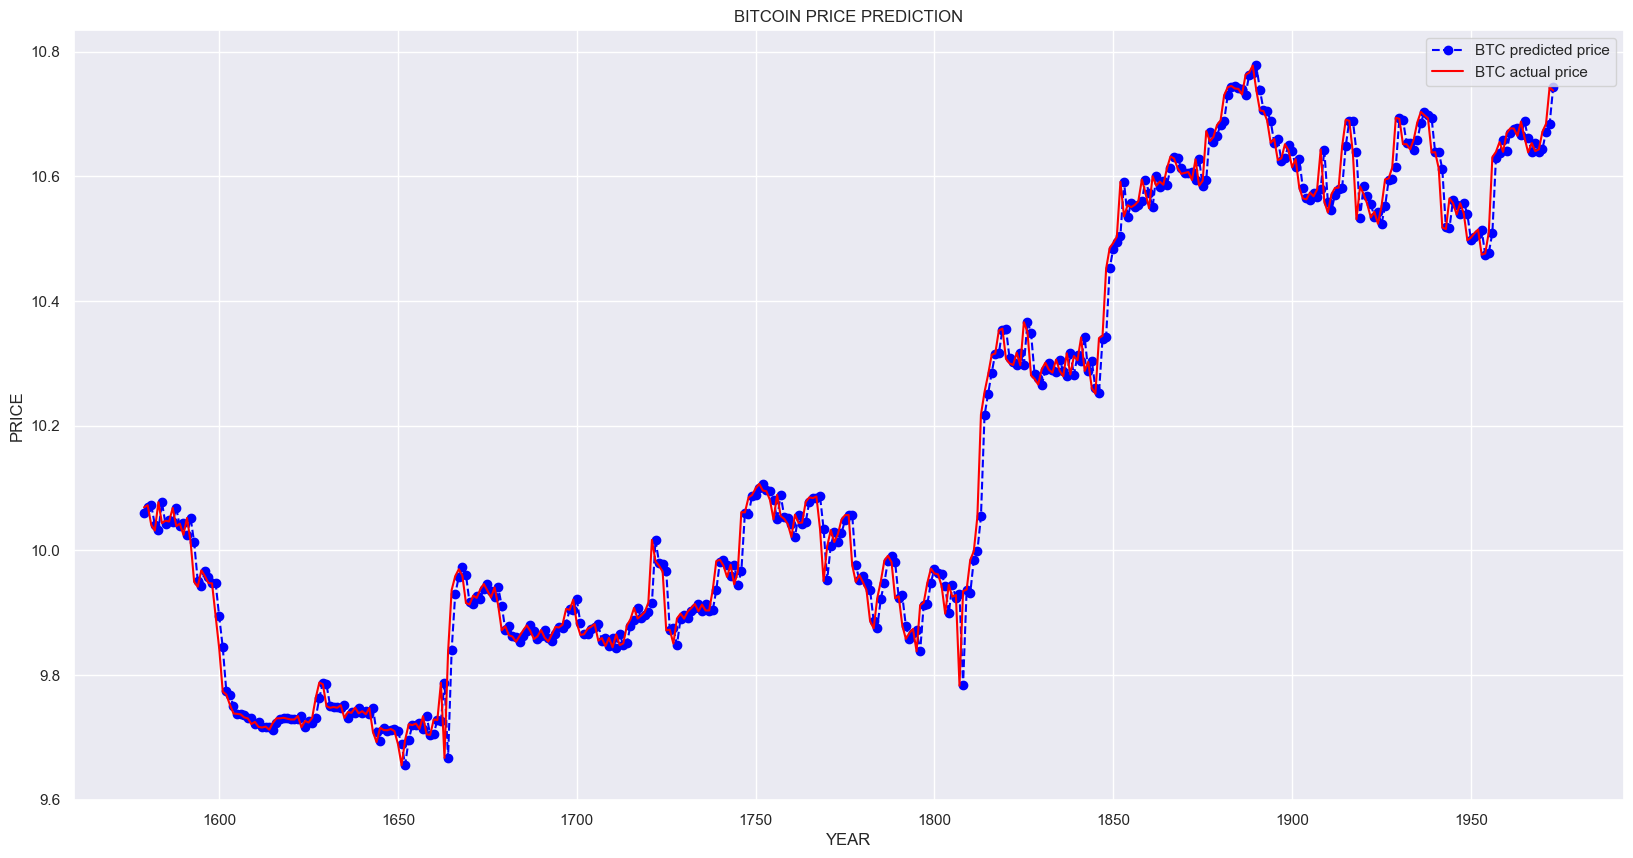

In [23]:
# Assuming `to_row` is set correctly, get the correct date range
date_range = df[train_size:].index[:len(model1_predictions)]
date_range

# Convert model_predictions list to a 1D array-like object
model1_predictions = np.ravel(model1_predictions)

# Convert testing_data list to a 1D array-like object using np.array()
testing_data = np.array(test_data)

# Check the lengths of all three arrays
print("Length of date_range:", len(date_range))
print("Length of model_predictions:", len(model1_predictions))
print("Length of testing_data:", len(testing_data))
plt.figure(figsize=(20,10))
plt.grid(True)
# Then, plot the data
plt.plot(date_range, model1_predictions, color='blue', marker='o', linestyle='dashed', label='BTC predicted price')
plt.plot(date_range, testing_data, color='red', label='BTC actual price')
plt.title('BITCOIN PRICE PREDICTION')
plt.xlabel('YEAR')
plt.legend()
plt.ylabel('PRICE')
plt.show()

In [24]:
mape=np.mean(np.abs(np.array(model1_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape))
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testing_data, model1_predictions)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testing_data, model1_predictions))
# Calculate R-squared (R2)
r_squared = r2_score(testing_data, model1_predictions)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r_squared)

MAPE:0.002188527639895626
MAE: 0.022273461671878193
RMSE: 0.03422127648940003
R-squared: 0.990376175487789


In [25]:
#ETH
import statsmodels.api as sm
# Filter BTC data from the DataFrame
eth_data = df[df['Crypto'] == 'ETH']

# Extract the 'Close' prices for BTC
eth_prices = eth_data['Close'].values

# Apply logarithmic transformation to the prices
log_eth_prices = np.log(eth_prices)

# Split the data into training and testing sets
train_size = int(0.8 * len(log_eth_prices))
train_data, test_data = log_eth_prices[:train_size], log_eth_prices[train_size:]

# Initialize an empty numpy array to store model predictions
model2_predictions = np.array([])

for i in range(len(test_data)):
    model = sm.tsa.ARIMA(train_data, order=(4, 1, 0))
    model1_fit = model.fit()
    output = model1_fit.forecast()
    yhat = np.array(output)
    print(yhat)
    model2_predictions = np.concatenate((model2_predictions, yhat))
    actual_test_value = test_data[i]
    train_data = np.append(train_data, actual_test_value)

[6.93710548]
[7.01057168]
[6.96297539]
[7.06672451]
[7.10884706]
[7.01015907]
[6.96261631]
[6.95323106]
[6.96490174]
[6.89234933]
[6.90873216]
[6.95354128]
[7.05162829]
[6.95681483]
[6.935807]
[6.92783926]
[6.9647205]
[7.14707756]
[7.2145735]
[7.24965425]
[7.09430423]
[7.13003796]
[7.15484598]
[7.03346421]
[7.00408471]
[6.9045906]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[6.86063703]
[6.84449022]
[6.83974439]
[6.7601852]
[6.62948178]
[4.82970059]
[4.86181693]
[4.8473769]
[4.79623654]
[4.83352311]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.8368274]
[4.82832003]
[4.85277867]
[4.84610962]
[4.88722223]
[4.844613]
[4.85447145]
[4.84096491]
[4.86973254]
[4.80313263]
[4.87993415]
[4.96075297]
[4.95679295]
[4.97575044]
[4.97728921]
[4.96072009]
[4.97693307]
[4.99343259]
[5.01912141]
[4.99268076]
[5.00097797]
[4.99726921]
[4.97683988]
[4.99671405]
[5.00051332]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.0172963]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.02465712]
[5.02819189]
[5.02637918]
[5.03516748]
[4.99756537]
[4.99798796]
[4.9699544]
[5.01758523]
[5.02977513]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.07518615]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.16823463]
[5.16317587]
[5.18753735]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.22439324]
[5.21056517]
[5.19199792]
[5.22075891]
[5.23162629]
[5.22670024]
[5.22677674]
[5.24504445]
[5.21839999]
[5.22358313]
[5.2283043]
[5.24924135]
[5.24803554]
[5.22828647]
[5.19717206]
[5.20957845]
[5.21617416]
[5.19913139]
[5.21043532]
[5.25617099]
[5.21447514]
[5.23002401]
[5.18697698]
[5.19752136]
[5.07914971]
[5.07686436]
[5.14685994]
[5.15399103]
[5.16581706]
[5.1469525]
[5.15969523]
[5.17209092]
[5.1606939]
[5.18670422]
[5.23210624]
[5.19763835]
[5.19754096]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.20333633]
[5.2577873]
[5.26124709]
[5.18107332]
[5.18884083]
[5.13991872]
[5.16396921]
[5.17757446]
[5.15103841]
[5.1777463]
[5.17974309]
[5.17559272]
[5.12806223]
[5.16149821]
[5.14002173]
[5.09906423]
[5.13991674]
[5.10911354]
[5.32260295]
[5.3397039]
[5.38013214]
[5.38334788]
[5.39433525]
[5.35422638]
[5.36255518]
[5.29242008]
[5.24120588]
[5.23665786]
[5.1946346]
[5.19050658]
[5.17437903]
[5.18087637]
[5.18900055]
[5.19348912]
[5.18859408]
[5.12826037]
[5.14736808]
[5.17174215]
[5.20005168]
[5.1946669]
[5.138726]
[5.11547323]
[5.12953318]
[5.13169553]
[5.14422324]
[5.2306658]
[5.22876721]
[5.21995128]
[5.24711966]
[5.26043178]
[5.26121817]
[5.22494698]
[5.27779886]
[5.289088]
[5.27549784]
[5.21033632]
[5.22154159]
[5.22842494]
[5.23599625]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.3355204]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.35803857]
[5.37419426]
[5.33567278]
[5.34408914]
[5.38222669]
[5.41263469]
[5.42158562]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.44893154]
[5.40125798]
[5.40401026]
[5.37432042]
[5.38144539]
[5.37153039]
[5.34254258]
[5.35494864]
[5.33539631]
[5.33589859]
[5.38908675]
[5.38683096]
[5.37288218]
[5.38423983]
[5.38485356]
[5.40754989]
[5.4496912]
[5.3974905]
[5.41890338]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.36075696]
[5.31372775]
[5.4427575]
[5.46831821]
[5.58118765]
[5.62899877]
[5.58711216]
[5.66711049]
[5.72027011]
[5.73944931]
[5.72717763]
[5.67973034]
[5.65795519]
[5.67860154]
[5.68211794]
[5.66441758]
[5.66453525]
[5.71532224]
[5.74444841]
[5.72747078]
[5.66564206]
[5.82508784]
[5.73025988]
[5.72559196]
[5.74952299]
[5.71838245]
[5.6836887]
[5.60694053]
[5.58844884]
[5.57199001]
[5.60703382]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.58398536]
[5.59723196]
[5.55393847]
[5.55629391]
[5.54283552]
[5.49867528]
[5.49749205]
[5.44373487]
[5.49455786]
[5.51211889]
[5.48546023]
[5.49845456]
[5.478954]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.5654989]
[5.58902835]
[5.5821382]
[5.56960719]
[5.5734678]
[5.59705174]
[5.60647988]
[5.58952817]
[5.57986322]
[5.52219709]
[5.53597797]
[5.49798702]
[5.51141773]
[5.57185178]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.53880569]
[5.55266429]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.4655535]
[5.45219548]
[5.54044038]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.47518779]
[5.32246925]
[5.30302814]
[5.24158114]
[5.13946377]
[5.14283973]
[5.12025136]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.12332487]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.13793633]
[5.15464253]
[5.09323668]
[5.08438143]
[5.1108783]
[5.06689028]
[5.06106083]
[5.05220041]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.02188132]
[5.03477701]
[5.057011]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.01760931]
[5.10729919]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.10234545]
[5.15283375]
[5.14889062]
[5.12710457]
[5.15454897]
[5.15038604]
[5.16968069]
[5.11602714]
[5.11036882]
[5.07476476]
[5.10220738]
[5.0928317]
[5.0987364]
[5.10466633]
[5.1720339]
[5.18119466]
[5.20241375]
[5.15511394]
[5.12052042]
[5.09752289]
[5.04552129]
[5.18149158]
[5.0713442]
[4.94798605]
[4.94860458]
[4.9445983]
[4.9418372]
[4.92002317]
[4.92420912]
[4.89031651]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.88061827]
[4.90305513]
[4.90992962]
[4.9110587]
[4.90712395]
[4.92580584]
[4.92411769]
[4.9214898]
[4.93468218]
[4.93871951]
[4.9123629]
[4.87777866]
[4.87620368]
[4.88791685]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.88203665]
[4.9043217]
[4.91130269]
[4.90947697]
[4.92420459]
[4.9152879]
[4.90607399]
[4.83103905]
[4.87288759]
[4.88450867]
[4.91315689]
[4.90806093]
[4.87530418]
[4.90464015]
[4.9096568]
[4.93437225]
[5.0549829]
[4.99095192]
[4.9697126]
[4.97902072]
[4.96056016]
[4.95023577]
[4.85877163]
[4.80555509]
[4.78849084]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.78796675]
[4.78900119]
[4.78378308]
[4.78318302]
[4.76439468]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.77309293]
[4.76499919]
[4.63502095]
[4.63583346]
[4.65951088]
[4.66531972]
[4.65487087]
[4.67052152]
[4.66600968]
[4.66165091]
[4.67584529]
[4.64893531]
[4.63981714]
[4.72652578]
[4.74512498]
[4.7470688]
[4.76042434]
[4.75661722]
[4.76692409]
[4.74636345]
[4.76746441]
[4.81872479]
[4.78209875]
[4.80277015]
[4.80608953]
[4.76857534]
[4.85425405]
[4.74713422]
[4.82711425]
[4.82978637]
[4.84633697]
[5.01067539]
[5.00356106]
[5.01825584]
[5.05269309]
[5.05593708]
[5.0381008]
[4.997297]
[5.04023553]


In [26]:
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1974
Model:                 ARIMA(4, 1, 0)   Log Likelihood                1832.038
Date:                Thu, 30 Nov 2023   AIC                          -3654.076
Time:                        13:09:06   BIC                          -3626.139
Sample:                             0   HQIC                         -3643.811
                               - 1974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0049      0.034      0.145      0.885      -0.061       0.071
ar.L2          0.0031      0.040      0.077      0.938      -0.075       0.081
ar.L3          0.0302      0.041      0.742      0.4

Length of date_range: 395
Length of model_predictions: 395
Length of testing_data: 395


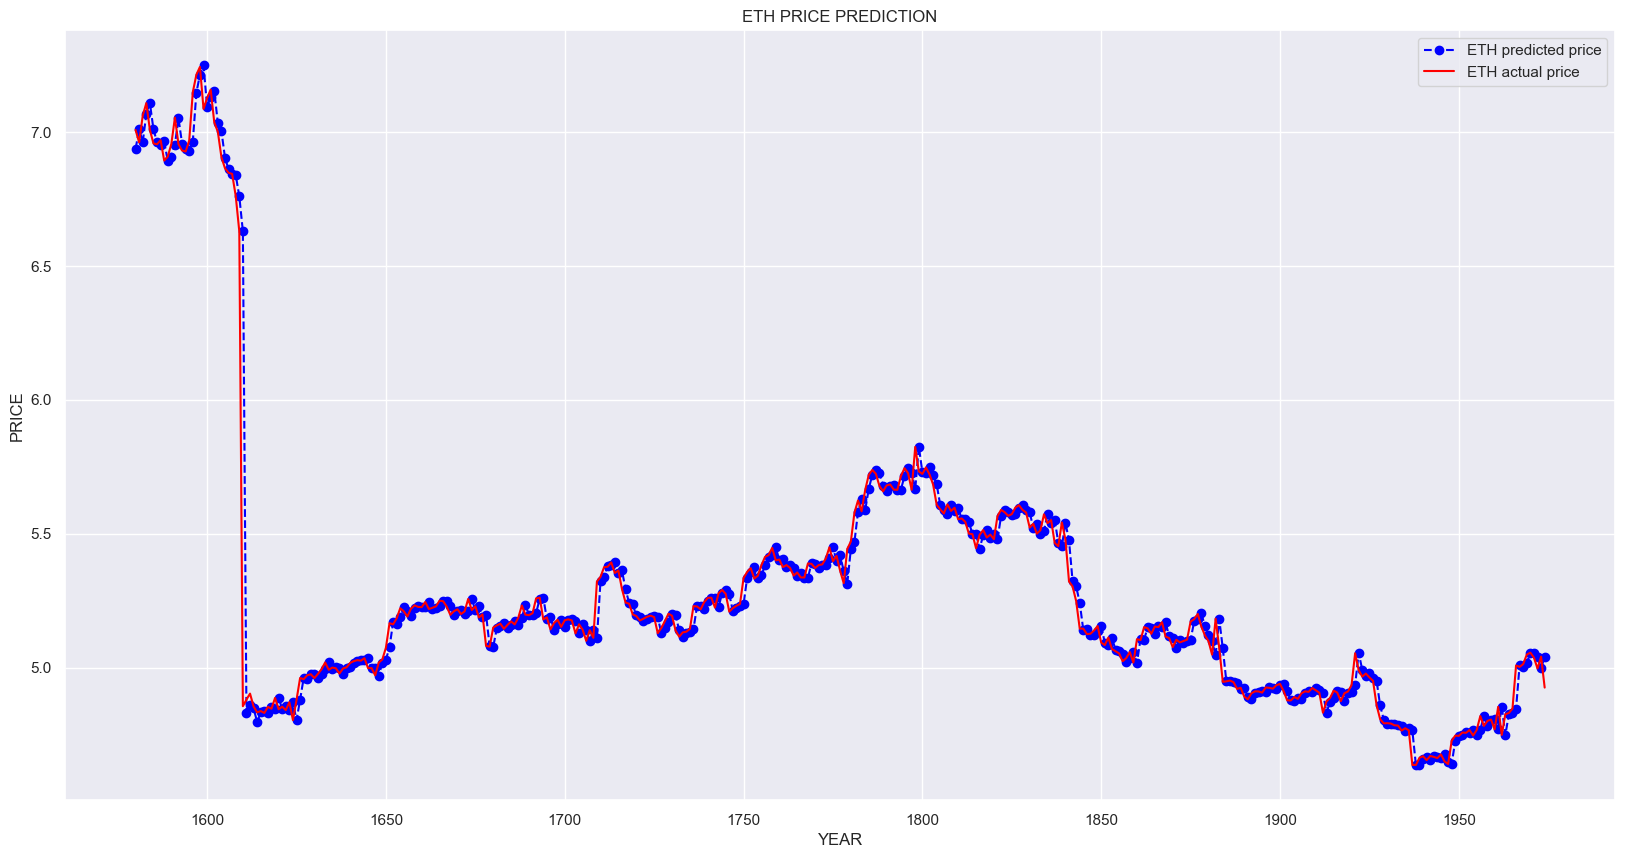

In [27]:
# Assuming `to_row` is set correctly, get the correct date range
date_range = df[train_size:].index[:len(model2_predictions)]
date_range

# Convert model_predictions list to a 1D array-like object
model2_predictions = np.ravel(model2_predictions)

# Convert testing_data list to a 1D array-like object using np.array()
testing_data = np.array(test_data)

# Check the lengths of all three arrays
print("Length of date_range:", len(date_range))
print("Length of model_predictions:", len(model2_predictions))
print("Length of testing_data:", len(testing_data))
plt.figure(figsize=(20,10))
plt.grid(True)
# Then, plot the data
plt.plot(date_range, model2_predictions, color='blue', marker='o', linestyle='dashed', label='ETH predicted price')
plt.plot(date_range, testing_data, color='red', label='ETH actual price')
plt.title('ETH PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [28]:
mape=np.mean(np.abs(np.array(model2_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape))
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testing_data, model2_predictions)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testing_data, model2_predictions))
# Calculate R-squared (R2)
r_squared = r2_score(testing_data, model2_predictions)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r_squared)

MAPE:0.006706675912284437
MAE: 0.03564807729441893
RMSE: 0.10023803613720136
R-squared: 0.9666012486486585


In [29]:
# Filter XRP data from the DataFrame
xrp_data = df[df['Crypto'] == 'XRP']

# Extract the 'Close' prices for XRP
xrp_prices = xrp_data['Close'].values

# Split the data into training and testing sets
train_size = int(0.8 * len(xrp_prices))
train_data, test_data = xrp_prices[:train_size], xrp_prices[train_size:]

# Initialize an empty numpy array to store model predictions
model3_predictions = np.array([])

for i in range(len(test_data)):
    model = sm.tsa.ARIMA(train_data, order=(4, 1, 0))
    model2_fit = model.fit()
    output = model2_fit.forecast()
    yhat = np.array(output)
    print(yhat)
    model3_predictions = np.concatenate((model3_predictions, yhat))
    actual_test_value = test_data[i]
    train_data = np.append(train_data, actual_test_value)


[0.94475155]
[1.12097677]
[1.09430465]
[1.2604125]
[1.36076647]
[1.22237262]
[1.21580881]
[1.29553428]
[1.35384719]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1.34519008]
[1.34570634]
[1.37108601]
[1.56333512]
[1.54661699]
[1.58621497]
[1.33944433]
[1.17620158]
[1.63544725]
[1.82654616]
[2.02703129]
[1.65304297]
[1.94116639]
[2.04086088]
[2.33811455]
[2.78617966]
[2.6238007]
[2.65060566]
[2.62009979]
[2.76845403]
[2.24076297]
[2.07891793]
[0.18316632]
[-0.33414139]
[0.44799793]
[0.08897968]
[0.18790449]
[0.19099842]
[0.18970741]
[0.19]
[0.19]
[0.20021174]
[0.19117804]
[0.18790458]
[0.19099835]
[0.19991894]
[0.18096674]
[0.19693647]
[0.22490552]
[0.2207815]
[0.21917501]
[0.22058594]
[0.22]
[0.22]
[0.22]
[0.23021134]
[0.23138908]
[0.21908324]
[0.21890403]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.22070541]
[0.21970701]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.22]
[0.22]
[0.23021132]
[0.23138893]
[0.2292946]
[0.23029299]
[0.21978869]
[0.21861107]
[0.2309167]
[0.23109591]
[0.22929462]
[0.24050417]
[0.25160016]
[0.25068347]
[0.24958775]
[0.27071602]
[0.26256632]
[0.25720139]
[0.27150204]
[0.27109538]
[0.26929536]
[0.27029313]
[0.28021107]
[0.28138845]
[0.27929537]
[0.29050429]
[0.31181101]
[0.301861]
[0.29749626]
[0.29108047]
[0.29852906]
[0.2918823]
[0.28761315]
[0.30120907]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.30109466]
[0.2992954]
[0.30029358]
[0.28978916]
[0.29882248]
[0.28167206]
[0.26601475]
[0.29073438]
[0.29289325]
[0.28829869]
[0.29058648]
[0.29]
[0.30021037]
[0.28096748]
[0.28673033]
[0.29308869]
[0.2785005]
[0.2686957]
[0.26931612]
[0.2704104]
[0.27991683]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.27117766]
[0.26790869]
[0.25057742]
[0.24693125]
[0.251408]
[0.24941355]
[0.25]
[0.25]
[0.25]
[0.23979007]
[0.23861232]
[0.24070397]
[0.23970679]
[0.25020992]
[0.2411779]
[0.27874513]
[0.27634116]
[0.28591921]
[0.2946535]
[0.29850771]
[0.31218405]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.290268]
[0.25618338]
[0.25753576]
[0.26152686]
[0.24891171]
[0.24861179]
[0.25070368]
[0.25991627]
[0.26138819]
[0.2592962]
[0.26029298]
[0.24979076]
[0.24861181]
[0.26091302]
[0.26109518]
[0.25929623]
[0.26029288]
[0.24979079]
[0.24861195]
[0.26091297]
[0.25088609]
[0.26832584]
[0.27377237]
[0.26830055]
[0.27058485]
[0.28020884]
[0.27117934]
[0.26790851]
[0.27099608]
[0.27991598]
[0.29159688]
[0.26005871]
[0.25542631]
[0.26240308]
[0.26932993]
[0.291805]
[0.30228043]
[0.31048153]
[0.30105881]
[0.28799096]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.29981724]
[0.31200838]
[0.31039118]
[0.31979701]
[0.32167934]
[0.31929609]
[0.3100829]
[0.31882152]
[0.32209138]
[0.31900398]
[0.31008321]
[0.30861268]
[0.3107041]
[0.3199168]
[0.31117845]
[0.31811714]
[0.31217537]
[0.3178243]
[0.33259254]
[0.34059973]
[0.32055806]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.31681349]
[0.32170165]
[0.29899836]
[0.30743374]
[0.32300321]
[0.32009886]
[0.34000443]
[0.32265021]
[0.3566438]
[0.39816395]
[0.40097444]
[0.40044502]
[0.40017218]
[0.37987409]
[0.38743343]
[0.40300232]
[0.4001013]
[0.39958787]
[0.40029121]
[0.42041673]
[0.42277402]
[0.3981766]
[0.46925402]
[0.47090408]
[0.4531254]
[0.48314273]
[0.48248091]
[0.43778228]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.42483857]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.43141083]
[0.42953419]
[0.46032683]
[0.42333707]
[0.40216317]
[0.40207766]
[0.39815479]
[0.40040898]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.38950522]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.39882058]
[0.38167431]
[0.40685303]
[0.42604445]
[0.41870857]
[0.39976271]
[0.38731778]
[0.44103564]
[0.44703044]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.42600879]
[0.43007429]
[0.430699]
[0.4501163]
[0.45276266]
[0.41799037]
[0.39603215]
[0.37892753]
[0.38797064]
[0.38199428]
[0.37733669]
[0.40139919]
[0.40247099]
[0.40880514]
[0.3711458]
[0.36377542]
[0.40370323]
[0.43358871]
[0.39121251]
[0.32202681]
[0.30502923]
[0.30009274]
[0.29827285]
[0.28990809]
[0.29853843]
[0.30208028]
[0.29900212]
[0.30029363]
[0.3]
[0.3]
[0.3]
[0.3]
[0.31020813]
[0.29096024]
[0.28654384]
[0.29170193]
[0.28941279]
[0.30020787]
[0.30137593]
[0.31971162]
[0.32304564]
[0.3185918]
[0.33079438]
[0.3313761]
[0.339504]
[0.34166944]
[0.31888059]
[0.31754106]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.32140757]
[0.32962171]
[0.32116817]
[0.32812763]
[0.35278842]
[0.3517544]
[0.35909369]
[0.3619622]
[0.35929643]
[0.36029311]
[0.32937687]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.36669687]
[0.35720537]
[0.30274122]
[0.30707637]
[0.31221961]
[0.30882879]
[0.31]
[0.31]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.2997941]
[0.29862607]
[0.31090706]
[0.31108102]
[0.30929885]
[0.31029278]
[0.32020589]
[0.31116799]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.30792513]
[0.32119965]
[0.3210807]
[0.30909328]
[0.30891962]
[0.31070095]
[0.30970693]
[0.31]
[0.31]
[0.31]
[0.31]
[0.31]
[0.32020574]
[0.31116781]
[0.29772002]
[0.30982631]
[0.31178081]
[0.31921174]
[0.31146082]
[0.30792581]
[0.31099403]
[0.33011781]
[0.30213171]
[0.32508799]
[0.32660846]
[0.31564387]
[0.32158008]
[0.31970691]
[0.32]
[0.29959277]
[0.29725245]
[0.30140124]
[0.29941382]
[0.3]
[0.3]
[0.3]
[0.3]
[0.3102036]
[0.30117024]
[0.28772223]
[0.28962011]
[0.30061105]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.30108014]
[0.29929932]
[0.30029327]
[0.3]
[0.3102036]
[0.3215771]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.29006235]
[0.2854737]
[0.31280138]
[0.31186301]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.30859958]
[0.32079074]
[0.31116896]
[0.31813093]
[0.32236545]
[0.31900672]
[0.33049624]
[0.32116933]
[0.32813078]
[0.32216262]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[0.31763486]
[0.33119512]
[0.32087698]
[0.32813057]
[0.33236436]
[0.329008]
[0.37110095]
[0.36528791]
[0.35583286]
[0.36186656]
[0.35970809]
[0.36]
[0.36]
[0.37020167]


Length of date_range: 395
Length of model_predictions: 395
Length of testing_data: 395


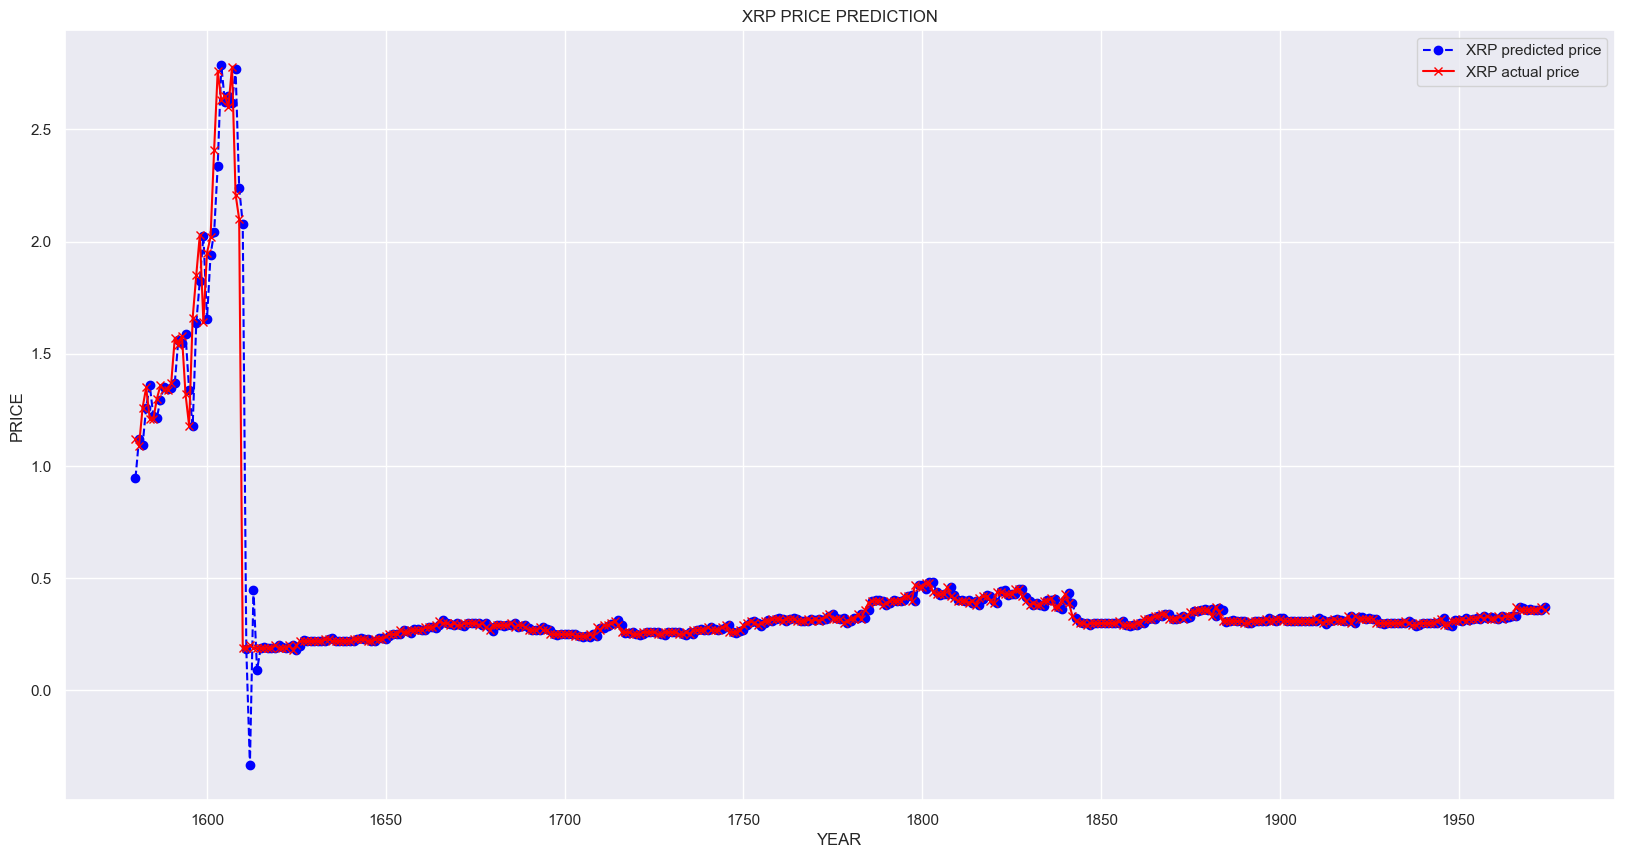

In [30]:
# Assuming `to_row` is set correctly, get the correct date range
date_range = df[train_size:].index[:len(model3_predictions)]
date_range

# Convert model_predictions list to a 1D array-like object
model3_predictions = np.ravel(model3_predictions)

# Convert testing_data list to a 1D array-like object using np.array()
testing_data = np.array(test_data)

# Check the lengths of all three arrays
print("Length of date_range:", len(date_range))
print("Length of model_predictions:", len(model3_predictions))
print("Length of testing_data:", len(testing_data))
plt.figure(figsize=(20,10))
plt.grid(True)
# Then, plot the data
plt.plot(date_range, model3_predictions, color='blue', marker='o', linestyle='dashed', label='XRP predicted price')
plt.plot(date_range, testing_data, color='red',marker='x', label='XRP actual price')
plt.title('XRP PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [31]:
mape=np.mean(np.abs(np.array(model3_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape))
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testing_data, model3_predictions)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testing_data, model3_predictions))
# Calculate R-squared (R2)
r_squared = r2_score(testing_data, model3_predictions)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r_squared)

MAPE:0.06881936357207935
MAE: 0.02772457765659776
RMSE: 0.11800987446930708
R-squared: 0.918420951247743


In [32]:
# Filter LTC data from the DataFrame
ltc_data = df[df['Crypto'] == 'LTC']

# Extract the 'Close' prices for LTC
ltc_prices = ltc_data['Close'].values

# Apply logarithmic transformation to the prices
log_ltc_prices = np.log(ltc_prices)

# Split the data into training and testing sets
train_size = int(0.8 * len(log_ltc_prices))
train_data, test_data = log_ltc_prices[:train_size], log_ltc_prices[train_size:]

# Initialize an empty numpy array to store model predictions
model4_predictions = np.array([])

for i in range(len(test_data)):
    model = sm.tsa.ARIMA(train_data, order=(4, 1, 0))
    model3_fit = model.fit()
    output = model3_fit.forecast()
    yhat = np.array(output)
    print(yhat)
    model4_predictions = np.concatenate((model4_predictions, yhat))
    actual_test_value = test_data[i]
    train_data = np.append(train_data, actual_test_value)

[4.95220223]
[5.08744503]
[5.08599387]
[5.19453155]
[5.26403056]
[5.19845534]
[5.17347205]
[5.18964432]
[5.19442442]
[5.17760864]
[5.193396]
[5.24973014]
[5.35003501]
[5.27550505]
[5.26483168]
[5.24023801]
[5.2452461]
[5.4354437]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.47440714]
[5.56569241]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[5.45713656]
[5.52540313]
[5.51522041]
[5.53261668]
[5.5882612]
[5.63358941]
[5.49196604]
[5.48202649]
[5.49534213]
[5.52927608]
[5.4249315]
[3.73780708]
[3.75929164]
[3.76182317]
[3.6604168]
[3.7096626]
[3.69284901]
[3.69163765]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.70349377]
[3.71235882]
[3.73673684]
[3.68475015]
[3.69481219]
[3.68341914]
[3.70678329]
[3.61069715]
[3.68890503]
[3.77333726]
[3.76399838]
[3.79209236]
[3.78337168]
[3.77083254]
[3.78167972]
[3.79504948]
[3.82096649]
[3.80922364]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.81083325]
[3.79988133]
[3.79764416]
[3.81063916]
[3.8178352]
[3.86439966]
[3.85723308]
[3.88361732]
[3.85914749]
[3.86795992]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.84945528]
[3.83493298]
[3.8108917]
[3.86266942]
[3.87750741]
[3.92163097]
[4.00902184]
[4.00355364]
[4.03060376]
[4.09164137]
[4.0605593]
[4.05295192]
[4.08192669]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.10449022]
[4.11665446]
[4.13555541]
[4.15970137]
[4.12557002]
[4.10692149]
[4.12067329]
[4.14826783]
[4.14624103]
[4.12195827]
[4.06335839]
[4.06633199]
[4.06247746]
[4.06421639]
[4.06262269]
[4.09631299]
[4.07186356]
[4.10427731]
[4.02935314]
[4.04193256]
[3.91183479]
[3.89808972]
[3.99013211]
[3.99421367]
[4.00534211]
[3.98794111]
[3.97094506]
[3.99761404]
[3.96012292]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.99658421]
[4.03889486]
[4.02766297]
[4.02673152]
[4.02397905]
[4.05688359]
[4.08068346]
[4.03759326]
[4.05221816]
[3.99967733]
[4.03405432]
[4.04421437]
[4.02367202]
[4.02105431]
[4.02436992]
[4.01373324]
[3.98075817]
[4.01554323]
[4.01022206]
[3.98491752]
[4.04756537]
[4.05362727]
[4.2282348]
[4.27866651]
[4.28741207]
[4.31446313]
[4.33421369]
[4.36124004]
[4.34467708]
[4.27280748]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.2545709]
[4.26470584]
[4.21695768]
[4.2323875]
[4.23131409]
[4.25787208]
[4.24061974]
[4.24336633]
[4.24216352]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.17695141]
[4.1696268]
[4.2120705]
[4.2368243]
[4.21484338]
[4.19792126]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.14157611]
[4.17751941]
[4.16191345]
[4.18993656]
[4.28357999]
[4.28997534]
[4.26931478]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.29982991]
[4.31577568]
[4.30014712]
[4.30219634]
[4.31830279]
[4.32682079]
[4.34816413]
[4.28056305]
[4.32302867]
[4.33685276]
[4.33895213]
[4.43232856]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.45272161]
[4.50591628]
[4.46218078]
[4.43790266]
[4.48657919]
[4.49382152]
[4.52666761]
[4.58135387]
[4.52970179]
[4.55229099]
[4.5441316]
[4.59095012]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.59088026]
[4.50301256]
[4.51196087]
[4.49089726]
[4.47608927]
[4.54570159]
[4.52638154]
[4.53874835]
[4.54212657]
[4.55288767]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.58996846]
[4.63710614]
[4.5808277]
[4.60984644]
[4.51504699]
[4.37929768]
[4.51198236]
[4.50314288]
[4.58461053]
[4.65984378]
[4.62329952]
[4.67584886]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.77519765]
[4.7960648]
[4.78566296]
[4.7904001]
[4.77793916]
[4.812153]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.77323711]
[4.76418875]
[4.77875231]
[4.86589032]
[4.89280201]
[4.78459389]
[4.72735188]
[4.86957881]
[4.87893165]
[4.88452409]
[4.94197905]
[4.95327807]
[4.92439058]
[4.91591279]
[4.93338887]
[4.89817583]
[4.89689012]
[4.9107568]
[4.92126608]
[4.86645331]
[4.88144561]
[4.89830208]
[4.92313098]
[4.8334127]
[4.74882966]
[4.77163931]
[4.73852046]
[4.65116718]
[4.63082924]
[4.61468042]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.70948039]
[4.72892779]
[4.72073087]
[4.71482094]
[4.708753]
[4.75536577]
[4.74509686]
[4.73882774]
[4.69052936]
[4.61793472]
[4.63630217]
[4.48284572]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.49148005]
[4.53066097]
[4.52217473]
[4.55062686]
[4.46918909]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.46468359]
[4.53309568]
[4.60556902]
[4.47517327]
[4.49735832]
[4.46728041]
[4.33763109]
[4.34384463]
[4.28793211]
[4.29379903]
[4.31032712]
[4.31367012]
[4.33425143]
[4.3377992]
[4.35900851]
[4.28057904]
[4.2749848]
[4.28171879]
[4.18997821]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.21182618]
[4.26232678]
[4.2532475]
[4.30361949]
[4.2871059]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.34299345]
[4.34847899]
[4.32948116]
[4.39652798]
[4.40521626]
[4.42244405]
[4.38120064]
[4.39303449]
[4.35080118]
[4.36343772]
[4.3531956]
[4.36063671]
[4.36480227]
[4.47935921]
[4.47316086]
[4.48110006]
[4.5315035]
[4.52225267]
[4.47887727]
[4.41567371]
[4.56761714]
[4.2924144]
[4.10043902]
[4.10813514]
[4.0842747]
[4.10076425]
[4.09905492]
[4.10974727]
[4.05913581]
[4.06381602]
[4.08143677]
[4.09438731]
[4.07801219]
[4.06639326]
[4.09198246]
[4.07542538]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[4.08050078]
[4.10260096]
[4.10010508]
[4.06728979]
[4.01746162]
[4.00731738]
[4.02342782]
[3.99144121]
[4.0289619]
[4.03784763]
[4.02371524]
[4.04066684]
[4.0065031]
[3.94593566]
[3.82104161]
[3.86031602]
[3.8701296]
[3.86587999]
[3.8265112]
[3.78558008]
[3.79268403]
[3.80571595]
[3.79772158]
[3.93289292]
[3.88963137]
[3.87969159]
[3.92446313]
[3.85110865]
[3.85224272]
[3.75859136]
[3.77043692]
[3.73469964]
[3.7201078]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.71742001]
[3.75541155]
[3.74009119]
[3.82554452]
[3.7856011]
[3.71934918]
[3.4982804]
[3.47842018]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.52043357]
[3.513872]
[3.49222449]
[3.49479716]
[3.5031579]
[3.43976527]
[3.44615249]
[3.4254137]


c:\Users\12114\OneDrive\Desktop\projects\cryptocurrency_prediction_app\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[3.40957103]
[3.48231682]
[3.49350577]
[3.47474974]
[3.48154769]
[3.45431428]
[3.44980633]
[3.42417196]
[3.42096574]
[3.47865308]
[3.43057064]
[3.44440985]
[3.44565464]
[3.41996574]
[3.46315306]
[3.40023053]
[3.45900271]
[3.4875533]
[3.50703036]
[3.66772187]
[3.66420538]
[3.63757734]
[3.6592778]
[3.56340065]
[3.47481829]
[3.44881397]
[3.4929439]


Length of date_range: 395
Length of model_predictions: 395
Length of testing_data: 395


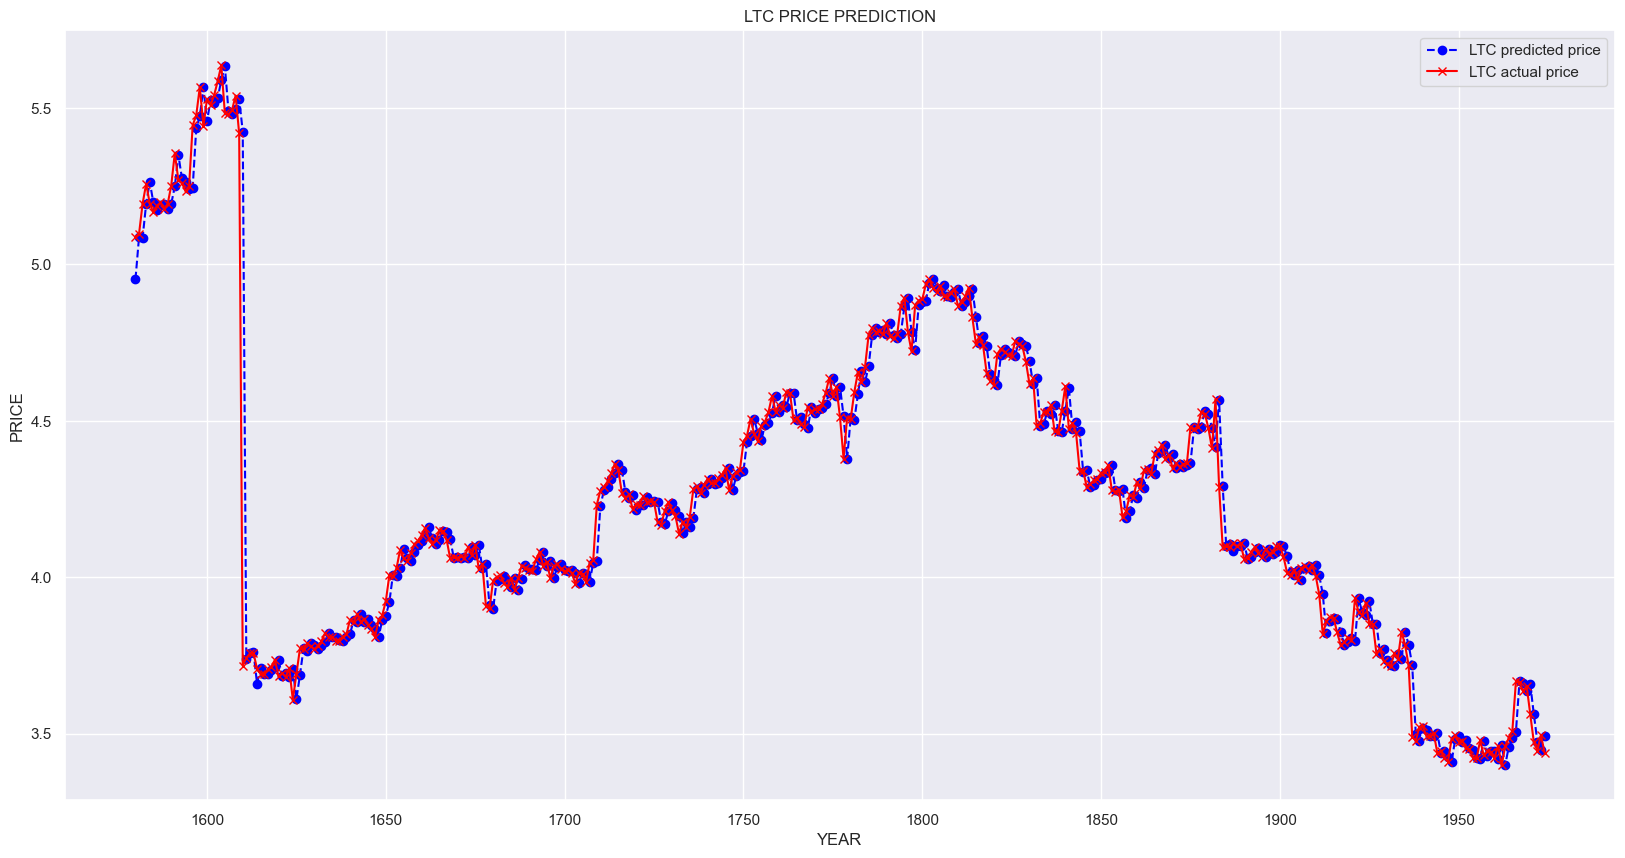

In [33]:
# Assuming `to_row` is set correctly, get the correct date range
date_range = df[train_size:].index[:len(model4_predictions)]
date_range

# Convert model_predictions list to a 1D array-like object
model4_predictions = np.ravel(model4_predictions)

# Convert testing_data list to a 1D array-like object using np.array()
testing_data = np.array(test_data)

# Check the lengths of all three arrays
print("Length of date_range:", len(date_range))
print("Length of model_predictions:", len(model4_predictions))
print("Length of testing_data:", len(testing_data))
plt.figure(figsize=(20,10))
plt.grid(True)
# Then, plot the data
plt.plot(date_range, model4_predictions, color='blue', marker='o', linestyle='dashed', label='LTC predicted price')
plt.plot(date_range, testing_data, color='red',marker='x', label='LTC actual price')
plt.title('LTC PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [34]:
mape=np.mean(np.abs(np.array(model4_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape))
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testing_data, model4_predictions)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(testing_data, model4_predictions))
# Calculate R-squared (R2)
r_squared = r2_score(testing_data, model4_predictions)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r_squared)

MAPE:0.009625197166203525
MAE: 0.040441575793049855
RMSE: 0.10089776481741532
R-squared: 0.9584058083819806
